# Identifying high flyers

In [42]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from sklearn.tree import DecisionTreeClassifier
random.seed(365)

In [43]:
# Globals
PCT_TRAIN = 0.6
N_ITERS = 10

In [44]:
# Function to fit a regression tree to data

def train_test_eval(features, labels, trial_name):
    
    # Math to split into train / test
    n_rows = features.shape[0]
    n_rows_training = round(PCT_TRAIN * n_rows)
    random_index = list(range(n_rows))
    
    # Track feature importance throughout the iterations
    all_feature_importance = pd.DataFrame({"feature_name": list(features)})

    # Fit the tree several times
    for i in range(N_ITERS):

        random.shuffle(random_index)

        # Get training data
        train_index = random_index[: n_rows_training]
        train_features = features.iloc[train_index]
        train_labels = labels[train_index]

        # Get test data
        test_index = random_index[n_rows_training :]
        test_features = features.loc[test_index]
        test_labels = labels[test_index]

        # Create a tree using the training data
        tree = DecisionTreeClassifier()
        tree.fit(train_features, train_labels)

        # Predict on the test data
        predicted_labels = tree.predict(test_features)

        # Calculate how well it performed (MCR)
        n_wrong = sum(test_labels != predicted_labels)
        mcr = n_wrong / len(test_labels)
        
        # Check feature importances
        all_feature_importance["trial_{}".format(i + 1)] = tree.feature_importances_
        importances = pd.DataFrame({
            "feature_name": list(features),
            "importance": tree.feature_importances_})

        # Print out the results
        print("\nTrial #{}:".format(i + 1))
        print("Misclassified {} of {} points | MCR = {}".format(n_wrong, len(test_labels), mcr))
        print("Five most useful features:")
        print(importances.sort_values(by="importance", ascending=False).head())
        
    # Create a plot of feature importance
    # There are a lot of problems with this plot, but I am new to matplotlib
    # I think it should be scatter, not line
    # Colors probably not necessary (just rows of black dots-- then we can nix the legend)
    # Missing titles and axes labels
    # x axis is not really readable
    # Right now it's sorted alphabetically, I'd prefer it to be sorted by mean feature importance
    df = all_feature_importance.sort_values(by="feature_name")
    fig = plt.figure(figsize=(11, 8))
    ax = fig.add_subplot(111)
    for i in range(N_ITERS):
        ax.plot(df["feature_name"], df["trial_{}".format(i + 1)], label=i + 1)
    ax.legend(loc=2)
    plt.savefig("{}.png".format(trial_name))
        
    return

## `baseline.csv` data

In [45]:
# Data cleaning

# Some columns / rows have too many NAs
baseline = pd.read_csv("data/baseline.csv")
baseline.drop(axis="columns", labels=["rec_attended_school", "dist_food_market"], inplace=True)
baseline.dropna(axis="index", how="any", inplace=True)
baseline.reset_index(inplace=True)
baseline.drop(axis="columns", labels=["index"], inplace=True)

# Recode 
baseline = baseline.replace("Willing to wait at least once", "1")
baseline = baseline.replace("Never willing to wait", "0")
baseline = baseline.astype({"imp_dich": "int32"})

### `HF2` as label


Trial #1:
Misclassified 46 of 296 points | MCR = 0.1554054054054054
Five most useful features:
  feature_name  importance
5     asst_idx    0.375385
2      rec_age    0.216070
0       hhsize    0.163058
6    lvstk_idx    0.128735
7     prod_idx    0.051810

Trial #2:
Misclassified 47 of 296 points | MCR = 0.15878378378378377
Five most useful features:
  feature_name  importance
5     asst_idx    0.281408
0       hhsize    0.186484
6    lvstk_idx    0.173896
2      rec_age    0.141220
7     prod_idx    0.115165

Trial #3:
Misclassified 60 of 296 points | MCR = 0.20270270270270271
Five most useful features:
  feature_name  importance
5     asst_idx    0.360150
0       hhsize    0.219483
7     prod_idx    0.135418
6    lvstk_idx    0.101906
2      rec_age    0.101717

Trial #4:
Misclassified 53 of 296 points | MCR = 0.17905405405405406
Five most useful features:
  feature_name  importance
5     asst_idx    0.309222
7     prod_idx    0.180875
2      rec_age    0.158458
6    lvstk_idx    0

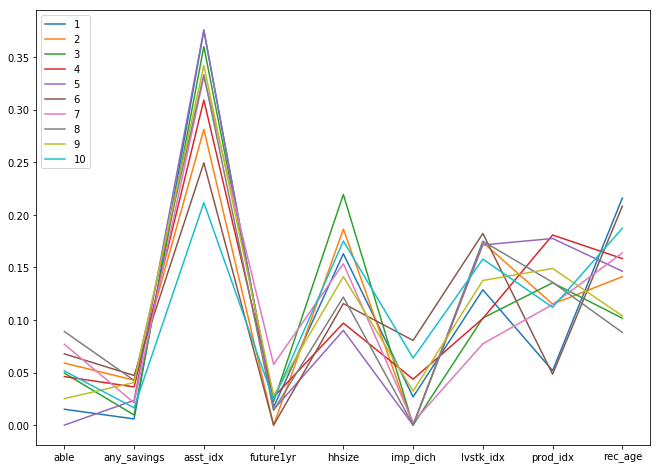

In [46]:
# Fit a basic classification tree to the baseline data with HF2 as labels

features = baseline[[
    "hhsize", "able", "rec_age", "imp_dich", "future1yr",
    "asst_idx", "lvstk_idx", "prod_idx", "any_savings"]]

labels = baseline["HF2"]

train_test_eval(features, labels, "baseline_hf2")

### `HF3` as label


Trial #1:
Misclassified 114 of 296 points | MCR = 0.38513513513513514
Five most useful features:
  feature_name  importance
5     asst_idx    0.316522
2      rec_age    0.178565
7     prod_idx    0.139552
0       hhsize    0.114814
6    lvstk_idx    0.092497

Trial #2:
Misclassified 110 of 296 points | MCR = 0.3716216216216216
Five most useful features:
  feature_name  importance
2      rec_age    0.254032
7     prod_idx    0.219189
5     asst_idx    0.179975
6    lvstk_idx    0.085902
0       hhsize    0.075146

Trial #3:
Misclassified 114 of 296 points | MCR = 0.38513513513513514
Five most useful features:
  feature_name  importance
2      rec_age    0.243028
5     asst_idx    0.192826
7     prod_idx    0.182989
0       hhsize    0.164157
6    lvstk_idx    0.095994

Trial #4:
Misclassified 110 of 296 points | MCR = 0.3716216216216216
Five most useful features:
  feature_name  importance
5     asst_idx    0.231370
2      rec_age    0.226715
7     prod_idx    0.173596
6    lvstk_idx  

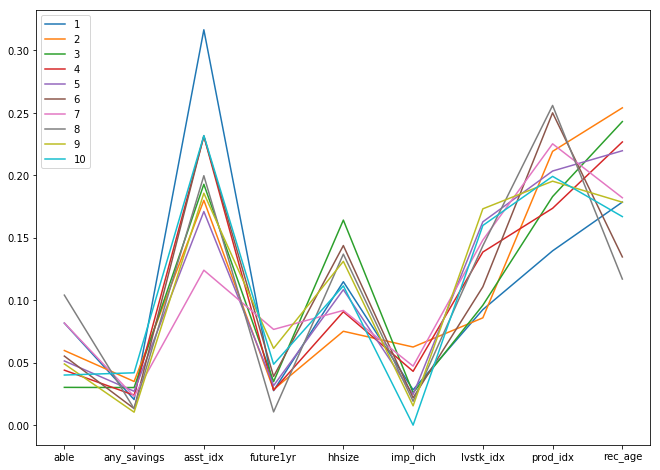

In [47]:
# Fit a basic classification tree to the baseline data with HF3 as labels

features = baseline[[
    "hhsize", "able", "rec_age", "imp_dich", "future1yr",
    "asst_idx", "lvstk_idx", "prod_idx", "any_savings"]]

labels = baseline["HF3"]

train_test_eval(features, labels, "baseline_hf3")

## `denver.csv` data

In [48]:
# Data cleaning

# Some rows have NAs
denver = pd.read_csv("data/denver.csv")
denver.dropna(axis="index", how="any", inplace=True)
denver.reset_index(inplace=True)
denver.drop(axis="columns", labels=["index"], inplace=True)

### `HF2` as labels


Trial #1:
Misclassified 49 of 304 points | MCR = 0.1611842105263158
Five most useful features:
       feature_name  importance
2        prod_idx_z    0.245416
8   inc_rev_idxSD_z    0.207264
0        asst_idx_z    0.204822
9  fin_debt_idxSD_z    0.142286
4     LGhrv_value_z    0.046641

Trial #2:
Misclassified 49 of 304 points | MCR = 0.1611842105263158
Five most useful features:
       feature_name  importance
0        asst_idx_z    0.295130
9  fin_debt_idxSD_z    0.195646
2        prod_idx_z    0.163701
1       lvstk_idx_z    0.148940
5    exp_total_ap_z    0.059600

Trial #3:
Misclassified 45 of 304 points | MCR = 0.14802631578947367
Five most useful features:
       feature_name  importance
8   inc_rev_idxSD_z    0.215161
9  fin_debt_idxSD_z    0.163830
0        asst_idx_z    0.127089
2        prod_idx_z    0.122652
6       LGnfe_rev_z    0.102114

Trial #4:
Misclassified 55 of 304 points | MCR = 0.18092105263157895
Five most useful features:
       feature_name  importance
0     

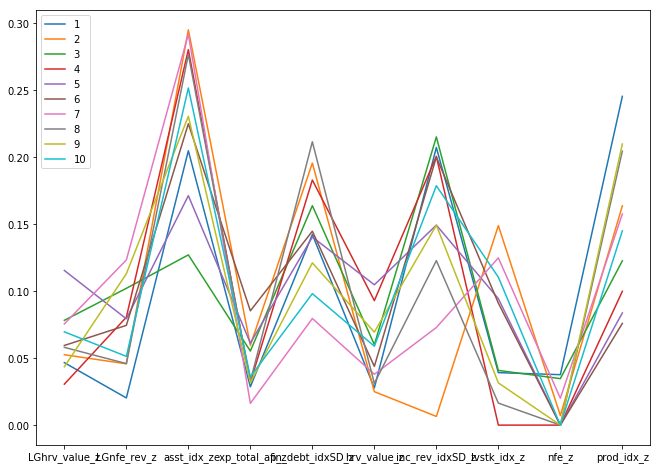

In [49]:
# Fit a basic classification tree to the denver data with HF2 as labels

features = denver[[
    "asst_idx_z", "lvstk_idx_z", "prod_idx_z", "hrv_value_z",
    "LGhrv_value_z", "exp_total_ap_z", "LGnfe_rev_z",
    "nfe_z", "inc_rev_idxSD_z", "fin_debt_idxSD_z"]]

labels = denver["HF2"]

train_test_eval(features, labels, "denver_hf2")

### `HF3` as labels


Trial #1:
Misclassified 107 of 304 points | MCR = 0.3519736842105263
Five most useful features:
       feature_name  importance
9  fin_debt_idxSD_z    0.199608
0        asst_idx_z    0.182702
2        prod_idx_z    0.145510
8   inc_rev_idxSD_z    0.144594
4     LGhrv_value_z    0.100514

Trial #2:
Misclassified 117 of 304 points | MCR = 0.3848684210526316
Five most useful features:
       feature_name  importance
2        prod_idx_z    0.248310
8   inc_rev_idxSD_z    0.153172
0        asst_idx_z    0.122582
9  fin_debt_idxSD_z    0.122511
3       hrv_value_z    0.119768

Trial #3:
Misclassified 104 of 304 points | MCR = 0.34210526315789475
Five most useful features:
       feature_name  importance
0        asst_idx_z    0.209087
8   inc_rev_idxSD_z    0.168210
2        prod_idx_z    0.159374
9  fin_debt_idxSD_z    0.151588
3       hrv_value_z    0.105609

Trial #4:
Misclassified 118 of 304 points | MCR = 0.3881578947368421
Five most useful features:
      feature_name  importance
0   

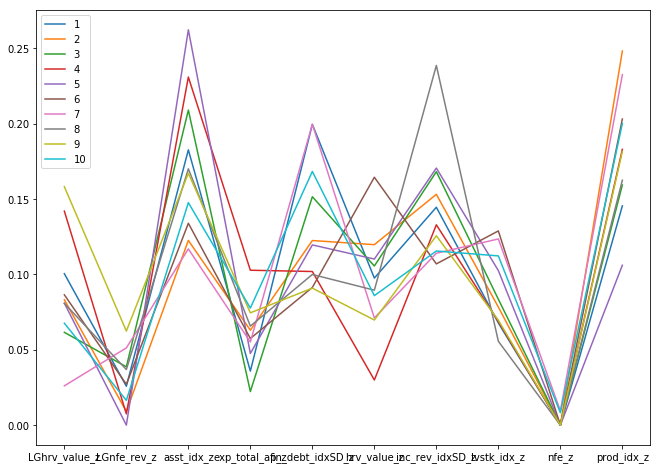

In [41]:
# Fit a basic classification tree to the denver data with HF3 as labels

features = denver[[
    "asst_idx_z", "lvstk_idx_z", "prod_idx_z", "hrv_value_z",
    "LGhrv_value_z", "exp_total_ap_z", "LGnfe_rev_z",
    "nfe_z", "inc_rev_idxSD_z", "fin_debt_idxSD_z"]]

labels = denver["HF3"]

train_test_eval(features, labels, "denver_hf3")